In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.signal
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def calc_ratio(array,plot_dir=None,filename=None,vid=None,save = False,window_size = 3):
    if save:
        plt.clf()
        plt.plot(array,label = 'Raw Data',alpha=0.7)
    array = [array.tolist()[0]]+array.tolist()+[array.tolist()[-1]]
    array = moving_average(array,window_size)
    if save:
        plt.plot(array,label = 'Moving Average: '+str(window_size),alpha=0.7)
    x = scipy.signal.find_peaks(-np.array(array),distance=32)[0]
    ratios = []
    for i in range(0,len(x)):
        if save:
            plt.scatter(x[i],array[x[i]],color='green')
        #if i==len(x)-1:
        #    y = np.argmax(array[x[i]:])
        #else:
        #    
        delta = 16-(16-min([x[i],16]))
        y = np.argmax(array[max([x[i]-16,0]):min([x[i]+16,len(array)])])
        if save:
            plt.scatter(y+x[i]-delta,array[y+x[i]-delta],color='red')
        x_val = array[x[i]]
        y_val = array[y+x[i]-delta]
        ratios.append(x_val/y_val)
    if save:
        #plt.legend()
        plt.savefig(os.path.join(plot_dir,filename[:-3]+'png'))
        plt.clf()
    ratios.sort()
    return ratios[1:-1]


In [63]:
import os
basic_dir = 'C:\\Users\\TheurerJ\\Documents\\Data\\StrainStudy\\Dilation 3 Downsample 2'




estimate = pd.read_csv(os.path.join(basic_dir,"Strain.csv"))#pd.DataFrame({"Filenames":Filenames,"Strain":Strain})
def find_id(x):
    return int(x.split('_')[1])
def find_machine(x):
    if x.split('_')[2] == 'EPIQ7C':
        return 'Philips'
    return 'GE'
estimate['ID'] = estimate.Filenames.apply(find_id)
estimate['Machine'] = estimate.Filenames.apply(find_machine)

estimate['Value'] = (estimate.Strain-1)*100
print(estimate[estimate.Value<-40])
#estimate = estimate[estimate.Value>-40]

                    Filenames    Strain  ID  Machine      Value
47  3UCTV2X1_17_EPIQ7C_NO.csv  0.596803  17  Philips -40.319702
48  3UCTV3EU_17_EPIQ7C_NO.csv  0.557281  17  Philips -44.271918
84  3WNIQZH1_30_EPIQ7C_NO.csv  0.498177  30  Philips -50.182345


In [64]:
estimate[['Filenames','Strain']].to_csv("Strain_Study_Computer.csv")

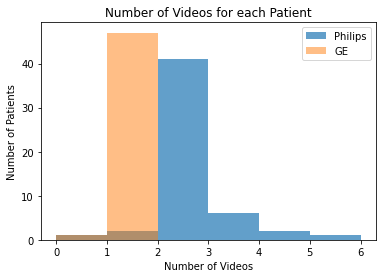

In [65]:
Video_count_dist = estimate[estimate.Machine == 'Philips'][['ID','Value']]
Video_count_dist = Video_count_dist.groupby("ID")['Value'].count()
plt.hist(Video_count_dist,label='Philips',alpha = 0.7,bins=max(Video_count_dist))
Video_count_dist = estimate[estimate.Machine == 'GE'][['ID','Value']]
Video_count_dist = Video_count_dist.groupby("ID")['Value'].count()
plt.hist(Video_count_dist,label='GE',alpha = 0.5,bins = max(Video_count_dist))
plt.title("Number of Videos for each Patient")
plt.xlabel("Number of Videos")
plt.ylabel("Number of Patients")
plt.legend()
plt.show()

In [66]:
col_1 = estimate[estimate.Machine == 'Philips'][['ID','Value']]
col_1 = col_1.groupby("ID")['Value'].mean()
col_1 = col_1.rename('Philips')
#col_1 = col_1.drop('Value',axis = 1)
col_2 = estimate[estimate.Machine == 'GE'][['ID','Value']]
col_2 = col_2.groupby("ID")['Value'].mean()
col_2 = col_2.rename('GE')
#col_2 = col_2.drop('Value',axis = 1)
estimations = pd.DataFrame({'Philips':col_1,'GE':col_2})

In [67]:
estimations

,Philips,GE
ID,,
1,-16.656742,NaN
2,-13.148242,NaN
3,-15.488718,NaN
4,-11.181205,NaN
5,-17.443423,NaN
6,-17.917758,NaN
8,-10.221470,-9.421592
9,-18.736557,-13.161912
10,-16.948678,-15.811517


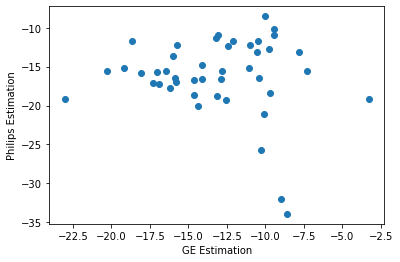

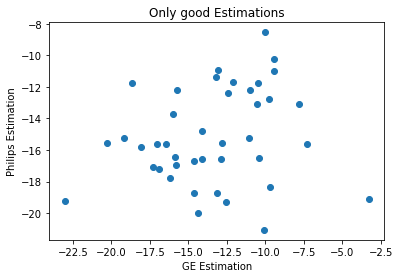

In [68]:
plt.scatter(estimations.GE,estimations.Philips)
plt.xlabel("GE Estimation")
plt.ylabel("Philips Estimation")
plt.show()
only_good_estimations = estimations[estimations.Philips>-22.5]
plt.title("Only good Estimations")
plt.scatter(only_good_estimations.GE,only_good_estimations.Philips)
plt.xlabel("GE Estimation")
plt.ylabel("Philips Estimation")
plt.show()

C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


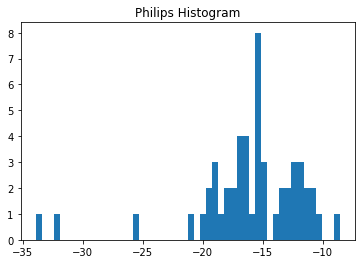

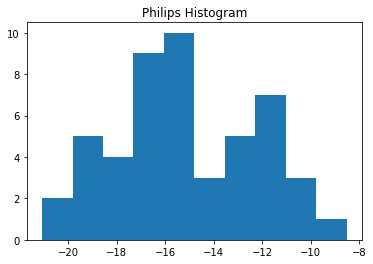

In [69]:
plt.hist(estimations.Philips,bins=50)
plt.title("Philips Histogram")
plt.show()
plt.hist(only_good_estimations.Philips,bins=10)
plt.title("Philips Histogram")
plt.show()

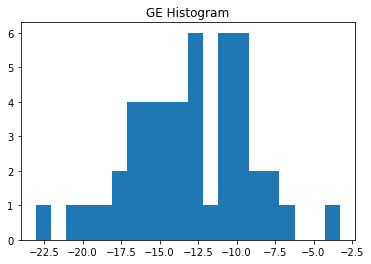

In [70]:
plt.hist(estimations.GE,bins=20)
plt.title("GE Histogram")
plt.show()

In [71]:
print("GE Count", len(estimations.GE.dropna()))
print("Philips Count", len(estimations.Philips.dropna()),"Good Philips Count", len(only_good_estimations.Philips.dropna()))
print("Matched Count",len(estimations.dropna()))

GE Count 47
Philips Count 52 Good Philips Count 49
Matched Count 44


In [72]:
measure = pd.read_csv('C:\\Users\\TheurerJ\\Documents\\Data\\Strain_Study_Reader.csv').set_index("MRN")
measure.head()

,Philips 1,Philips 2,GE 1,GE 2
MRN,,,,
1,-15.3,-18.6,-13.0,-14.4
2,-22.7,-14.8,-17.8,-17.8
3,-19.1,-20.9,-15.9,-17.7
4,-24.2,-22.4,-17.9,-23.6
5,-18.1,-20.3,-17.8,-16.8


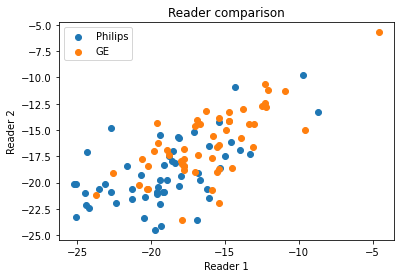

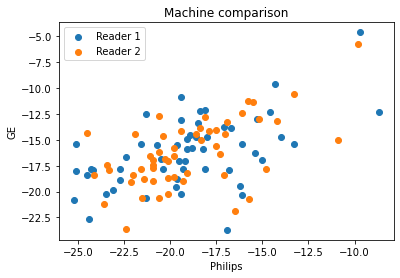

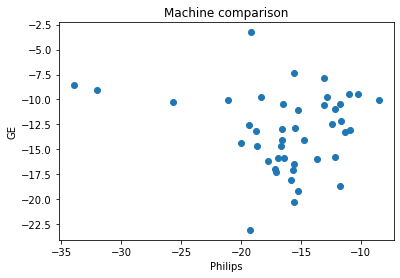

In [73]:
plt.scatter(measure['Philips 1'],measure['Philips 2'],label='Philips')

plt.scatter(measure['GE 1'],measure['GE 2'],label='GE')
plt.xlabel("Reader 1")
plt.ylabel("Reader 2")
plt.title("Reader comparison")
plt.legend()
plt.show()
plt.scatter(measure['Philips 1'],measure['GE 1'],label='Reader 1')

plt.scatter(measure['Philips 2'],measure['GE 2'],label = 'Reader 2')
plt.xlabel("Philips")
plt.ylabel("GE")
plt.title("Machine comparison")
plt.legend()
plt.show()
plt.scatter(estimations['Philips'],estimations['GE'])
plt.xlabel("Philips")
plt.ylabel("GE")
plt.title("Machine comparison")
plt.show()

# for the serious comparison

In [74]:
total = measure.join(estimations)
total.tail()
def elim(num):
    if num<-22.5:
        return None
    return num
total.Philips = total.Philips.apply(elim)
total

,Philips 1,Philips 2,GE 1,GE 2,Philips,GE
MRN,,,,,,
1,-15.3,-18.6,-13.0,-14.4,-16.656742,NaN
2,-22.7,-14.8,-17.8,-17.8,-13.148242,NaN
3,-19.1,-20.9,-15.9,-17.7,-15.488718,NaN
4,-24.2,-22.4,-17.9,-23.6,-11.181205,NaN
5,-18.1,-20.3,-17.8,-16.8,-17.443423,NaN
6,-19.2,-20.9,-17.0,-19.0,-17.917758,NaN
7,-9.7,-9.8,-4.6,-5.7,NaN,NaN
8,-14.3,-10.9,-9.6,-15.0,-10.221470,-9.421592
9,-19.6,-20.9,-18.8,-17.4,-18.736557,-13.161912


In [75]:
len(total.dropna())

39

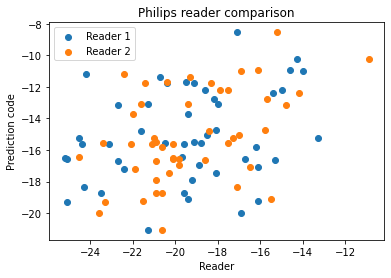

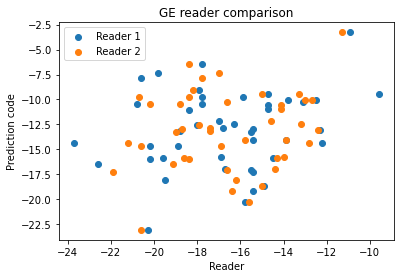

In [76]:
plt.scatter(total['Philips 1'],total['Philips'],label = 'Reader 1')
plt.xlabel("Reader")
plt.ylabel("Prediction code")
plt.title("Philips reader comparison")
plt.scatter(total['Philips 2'],total['Philips'],label='Reader 2')
plt.legend()
plt.show()
plt.scatter(total['GE 1'],total['GE'],label = 'Reader 1')
plt.xlabel("Reader")
plt.ylabel("Prediction code")
plt.title("GE reader comparison")
plt.scatter(total['GE 2'],total['GE'],label='Reader 2')
plt.legend()
plt.show()

In [77]:
shortcut = total[['Philips 1','Philips']].dropna()
print("Reader 1 Philips r value:", linregress(shortcut['Philips 1'],shortcut['Philips'])[2])
shortcut = total[['Philips 2','Philips']].dropna()
print("Reader 2 Philips r value:", linregress(shortcut['Philips 2'],shortcut['Philips'])[2])
shortcut = total[['GE 1','GE']].dropna()
print("Reader 1 GE r value:", linregress(shortcut['GE 1'],shortcut['GE'])[2])
shortcut = total[['GE 2','GE']].dropna()
print("Reader 2 GE r value:", linregress(shortcut['GE 2'],shortcut['GE'])[2])

Reader 1 Philips r value: 0.2853538187627997
Reader 2 Philips r value: 0.447988200717822
Reader 1 GE r value: 0.22704711986236198
Reader 2 GE r value: 0.1972976688743826


In [78]:
shortcut = total[['Philips 1','Philips 2']].dropna()
print("Reader comparison Philips r value:", linregress(shortcut['Philips 1'],shortcut['Philips 2'])[2])
shortcut = total[['GE 1','GE 2']].dropna()
print("Reader comparison GE r value:", linregress(shortcut['GE 1'],shortcut['GE 2'])[2])

Reader comparison Philips r value: 0.5800621507858098
Reader comparison GE r value: 0.7230775663085318


In [79]:
total.describe()

,Philips 1,Philips 2,GE 1,GE 2,Philips,GE
count,54.000000,54.000000,54.000000,53.000000,48.000000,44.000000
mean,-19.038889,-19.072222,-16.190741,-16.296226,-15.121538,-13.064560
std,3.662426,3.134315,3.370587,3.275372,2.903524,3.944956
min,-25.200000,-24.500000,-23.700000,-23.600000,-21.070206,-23.049814
25%,-21.300000,-20.975000,-17.975000,-18.400000,-16.974873,-15.821761
50%,-19.150000,-19.800000,-16.100000,-16.600000,-15.550853,-13.001725
75%,-16.825000,-17.150000,-14.550000,-14.100000,-12.698453,-10.234600
max,-8.700000,-9.800000,-4.600000,-5.700000,-8.530986,-3.270585


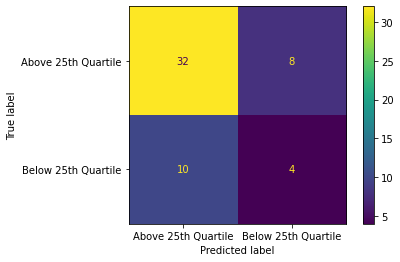

In [80]:
total['Predicted_Below'] = total['Philips']<=-17.047651
total['Reader_2_Below'] = total['Philips 2']<=-20.975000
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(total['Reader_2_Below'], total['Predicted_Below'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Above 25th Quartile','Below 25th Quartile'])
disp.plot()

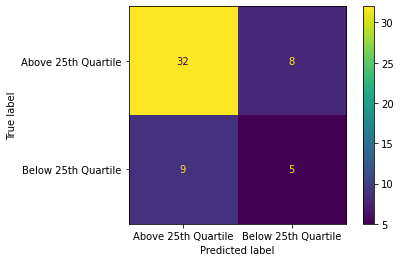

In [81]:
total['Reader_1_Below'] = total['Philips 1']<-21.300000
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(total['Reader_2_Below'], total['Reader_1_Below'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Above 25th Quartile','Below 25th Quartile'])
disp.plot()

In [82]:
from statsmodels.graphics.agreement import mean_diff_plot

Text(0.5, 1.0, 'Limits of agreement on Philips Machine')

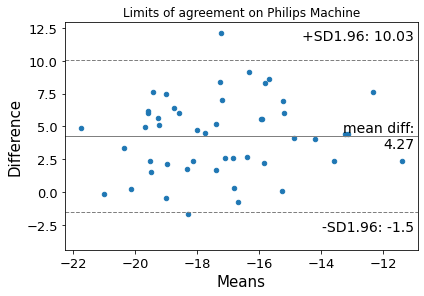

In [87]:
plot = mean_diff_plot(total['Philips'],(total['Philips 1']+total['Philips 2'])/2)
plt.title("Limits of agreement on Philips Machine")

In [50]:
4.37, 11.55, -2.8

(4.37, 11.55, -2.8)

In [89]:
basic_dir = 'C:\\Users\\TheurerJ\\Documents\\Data\\StrainStudy\\Dilation 3 Downsample 2'
downsample2 = pd.read_csv(os.path.join(basic_dir,"Strain.csv"))#pd.DataFrame({"Filenames":Filenames,"Strain":Strain})
downsample2.head()

,Filenames,Strain
0,2PXGZZJY_1_EPIQ7C_NO.csv,0.822645
1,2PXGZZSF_1_EPIQ7C_NO.csv,0.830750
2,2PXH00B2_1_EPIQ7C_NO.csv,0.827534
3,2PXH00D0_1_EPIQ7C_NO.csv,0.855008
4,2PXH00ZW_1_EPIQ7C_NO.csv,0.828785


In [90]:
basic_dir = 'C:\\Users\\TheurerJ\\Documents\\Data\\StrainStudy\\Dilation 0 Downsample 0'
downsample0 = pd.read_csv(os.path.join(basic_dir,"Strain.csv"))
downsample0.head()

,Filenames,Strain
0,2PXGZZJY_1_EPIQ7C_NO_dilation0_downsample1_thi...,0.794574
1,2PXGZZSF_1_EPIQ7C_NO_dilation0_downsample1_thi...,0.795214
2,2PXH00B2_1_EPIQ7C_NO_dilation0_downsample1_thi...,0.807567
3,2PXH00D0_1_EPIQ7C_NO_dilation0_downsample1_thi...,0.826470
4,2PXH00ZW_1_EPIQ7C_NO_dilation0_downsample1_thi...,0.806007


ValueError: x and y must be the same size

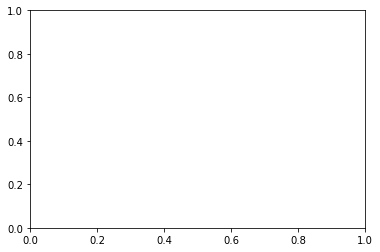

In [91]:
plt.scatter(downsample2.Strain,downsample0.Strain)

In [92]:
downsample0.Strain

0      0.794574
1      0.795214
2      0.807567
3      0.826470
4      0.806007
         ...   
149    0.806258
150    0.843516
151    0.908839
152    0.833569
153    0.837516
Name: Strain, Length: 154, dtype: float64